Misclassified samples: 4
Accuracy: 0.91


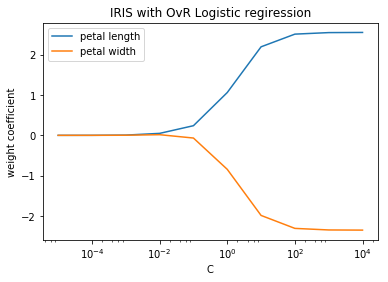

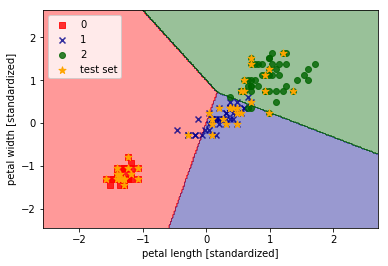

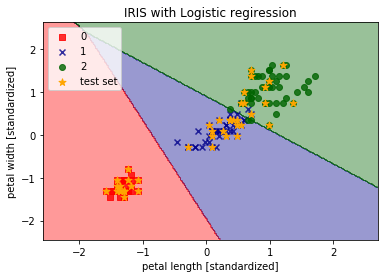

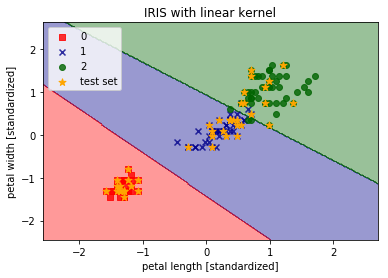

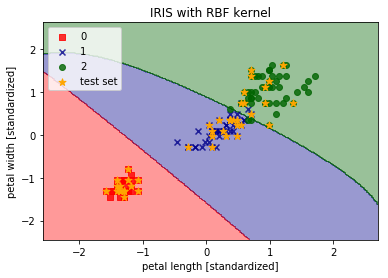

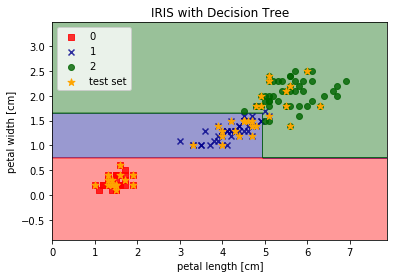

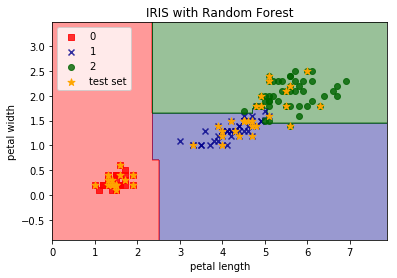

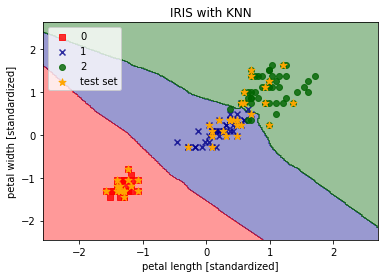

In [3]:
##
# PYTHONPATH=. python3 apps/train_test.py
#

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from apps.utils import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

def logistic_regression(X_train_std, y_train, X_test_std, y_test):
    lr = LogisticRegression(C=1000.0, random_state=0)
    lr.fit(X_train_std, y_train)
    X_comb_std = np.vstack((X_train_std, X_test_std))
    y_comb = np.hstack((y_train, y_test))
    plot_decision_regions(X_comb_std, y_comb, classifier=lr, test_idx=range(105, 150))
    plt.title('IRIS with Logistic regiression')
    plt.xlabel('petal length [standardized]')
    plt.ylabel('petal width [standardized]')
    plt.legend(loc='upper left')
    plt.show()
    plt.close()

def decision_regions(X_train_std, y_train, X_test_std, y_test, classifier):
    X_comb_std = np.vstack((X_train_std, X_test_std))
    y_comb = np.hstack((y_train, y_test))
    plot_decision_regions(X_comb_std, y_comb, classifier=classifier, test_idx=range(105, 150))
    plt.xlabel('petal length [standardized]')
    plt.ylabel('petal width [standardized]')
    plt.legend(loc='upper left')
    plt.show()
    plt.close()

def logistic_regression_ovr(X_train_std, y_train, X_test_std, y_test):
    weights, params = [], []
    for c in np.arange(-5, 5):
        C = np.power(10, c) if c >= 0 else 1/np.power(10, -c)
        lr = LogisticRegression(C=C, random_state=0)
        lr.fit(X_train_std, y_train)
        weights.append(lr.coef_[1])
        params.append(C)
    weights = np.array(weights)
    plt.plot(params, weights[:, 0], label='petal length')
    plt.plot(params, weights[:, 1], linestyle='-', label='petal width')
    plt.title('IRIS with OvR Logistic regiression')
    plt.xlabel('C')
    plt.ylabel('weight coefficient')
    plt.legend(loc='upper left')
    plt.xscale('log')
    plt.show()
    plt.close()

def linear_kernel(X_train_std, y_train, X_test_std, y_test):
    svm = SVC(kernel='linear', C=1.0, random_state=0)
    svm.fit(X_train_std, y_train)
    X_comb_std = np.vstack((X_train_std, X_test_std))
    y_comb = np.hstack((y_train, y_test))
    plot_decision_regions(X_comb_std, y_comb,
            classifier=svm, test_idx=range(105, 150))
    plt.title('IRIS with linear kernel')
    plt.xlabel('petal length [standardized]')
    plt.ylabel('petal width [standardized]')
    plt.legend(loc='upper left')
    plt.show()
    plt.close()

def rbf_kernel(X_train_std, y_train, X_test_std, y_test):
    svm = SVC(kernel='rbf', gamma=0.2, C=1.0, random_state=0)
    svm.fit(X_train_std, y_train)
    X_comb_std = np.vstack((X_train_std, X_test_std))
    y_comb = np.hstack((y_train, y_test))
    plot_decision_regions(X_comb_std, y_comb,
            classifier=svm, test_idx=range(105, 150))
    plt.title('IRIS with RBF kernel')
    plt.xlabel('petal length [standardized]')
    plt.ylabel('petal width [standardized]')
    plt.legend(loc='upper left')
    plt.show()
    plt.close()

def sk_decision_tree(X_train, y_train, X_test, y_test):
    """
    dot -Tpng build/tree.dot -o build/tree.png
    """
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
    tree.fit(X_train, y_train)
    export_graphviz(tree, out_file='build/tree.dot', feature_names=['petal length', 'petal width'])
    X_comb = np.vstack((X_train, X_test))
    y_comb = np.hstack((y_train, y_test))
    plot_decision_regions(X_comb, y_comb, classifier=tree, test_idx=range(105, 150))
    plt.title('IRIS with Decision Tree')
    plt.xlabel('petal length [cm]')
    plt.ylabel('petal width [cm]')
    plt.legend(loc='upper left')
    plt.show()
    plt.close()

def random_forest(X_train, y_train, X_test, y_test):
    forest = RandomForestClassifier(criterion='entropy',
            n_estimators=10, random_state=1, n_jobs=2)
    forest.fit(X_train, y_train)
    X_comb = np.vstack((X_train, X_test))
    y_comb = np.hstack((y_train, y_test))
    plot_decision_regions(X_comb, y_comb,
            classifier=forest, test_idx=range(105, 150))
    plt.title('IRIS with Random Forest')
    plt.xlabel('petal length')
    plt.ylabel('petal width')
    plt.legend(loc='upper left')
    plt.show()
    plt.close()

def knn(X_train_std, y_train, X_test_std, y_test):
    knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
    knn.fit(X_train_std, y_train)
    X_comb_std = np.vstack((X_train_std, X_test_std))
    y_comb = np.hstack((y_train, y_test))
    plot_decision_regions(X_comb_std, y_comb, classifier=knn, test_idx=range(105, 150))
    plt.title('IRIS with KNN')
    plt.xlabel('petal length [standardized]')
    plt.ylabel('petal width [standardized]')
    plt.legend(loc='upper left')
    plt.show()
    plt.close()

def selftest():
    """
Using sklearn classifier
------------------------
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')
    """
    iris = datasets.load_iris()
    X = iris.data[:, [2, 3]]
    y = iris.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)
    ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
    ppn.fit(X_train_std, y_train)
    y_pred = ppn.predict(X_test_std)
    print('Misclassified samples: %d' % (y_test!=y_pred).sum())
    print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
    logistic_regression_ovr(X_train_std, y_train, X_test_std, y_test)
    
    decision_regions(X_train_std, y_train, X_test_std, y_test, ppn)
    logistic_regression(X_train_std, y_train, X_test_std, y_test)
    linear_kernel(X_train_std, y_train, X_test_std, y_test)
    rbf_kernel(X_train_std, y_train, X_test_std, y_test)
    sk_decision_tree(X_train, y_train, X_test, y_test)
    random_forest(X_train, y_train, X_test, y_test)
    knn(X_train_std, y_train, X_test_std, y_test)
    

if __name__ == '__main__':
    selftest()



In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cnt_vec = CountVectorizer()
cnt = cnt_vec.fit_transform(['petal','panel','panel',
                             'panel begin'])
cnt.shape

(4, 3)

Class labels:
 [1 2 3]
head:
    Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0            1    14.23        1.71  2.43               15.6        127   
1            1    13.20        1.78  2.14               11.2        100   
2            1    13.16        2.36  2.67               18.6        101   
3            1    14.37        1.95  2.50               16.8        113   
4            1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/0D315 of diluted wines  Proline  
0             5.64  1.04  

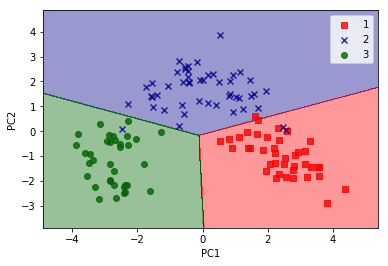

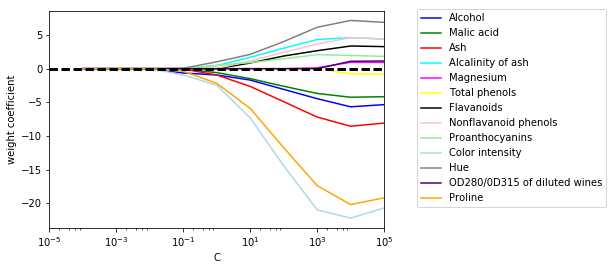

1 30 Alcohol 0.182482616331
2 30 Malic acid 0.158609774392
3 30 Ash 0.150947947978
4 30 Alcalinity of ash 0.131986797428
5 30 Magnesium 0.106589061225
6 30 Total phenols 0.0782427880969
7 30 Flavanoids 0.0607175986515
8 30 Nonflavanoid phenols 0.0320331912092
9 30 Proanthocyanins 0.0253996783254
10 30 Color intensity 0.0223511224704
11 30 Hue 0.0220780740408
12 30 OD280/0D315 of diluted wines 0.0146451608766
13 30 Proline 0.0139161889755


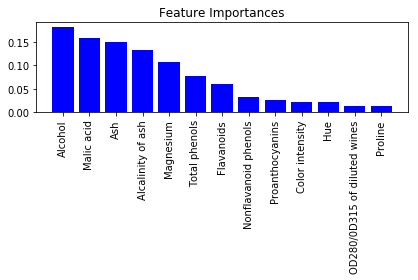

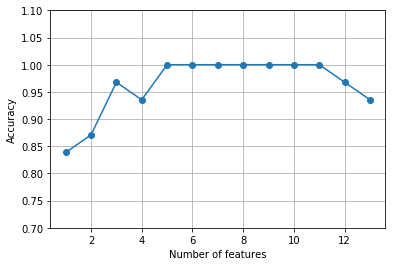

In [2]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from apps.utils import eigenpair, plot_decision_regions
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

WINE_DATA = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

def build_data():
    df_wine = pd.read_csv(WINE_DATA, header=None)
    df_wine.columns = ['Class label', 'Alcohol',
            'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
            'Total phenols', 'Flavanoids',
            'Nonflavanoid phenols', 'Proanthocyanins',
            'Color intensity', 'Hue',
            'OD280/0D315 of diluted wines', 'Proline']
    print('Class labels:\n', np.unique(df_wine['Class label']))
    print('head:\n', df_wine.head())
    return df_wine

def wine_learn():
    df_wine = build_data()
    X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
    X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=0.3, random_state=0)
    #print(X_train, X_test, y_train, y_test)
    """
    x_norm(i) = (x(i)-x_min)/(x_max-x_min)

    """
    mms = MinMaxScaler()
    X_train_norm = mms.fit_transform(X_train)
    X_test_norm = mms.transform(X_test)
    #print(X_train_norm, X_test_norm)
    """
    x_std(i) = (x(i)-x_mu)/x_sigma
    """
    stdsc = StandardScaler()
    X_train_std = stdsc.fit_transform(X_train)
    X_test_std = stdsc.transform(X_test)

    lr = LogisticRegression(penalty='l1', C=0.1)
    lr.fit(X_train_std, y_train)
    print('accuracy/train\n:', lr.score(X_train_std, y_train))
    print('accuracy/test\n:', lr.score(X_test_std, y_test))
    print('intercept:\n', lr.intercept_)
    print('coef:\n', lr.coef_)

    colors = ['blue', 'green', 'red', 'cyan',
        'magenta', 'yellow', 'black', 'pink',
        'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']

    weights, params = [], []
    for c in np.arange(-4, 6):
        C = 10**c if c > 0 else 1/10**(-c)
        lr = LogisticRegression(penalty='l1', C=C, random_state=0)
        lr.fit(X_train_std, y_train)
        weights.append(lr.coef_[1])
        params.append(C)
    weights = np.array(weights)
    with_pca(X_train_std, y_train, X_test_std)
    plotting(df_wine, weights, params, colors)
    with_randomforest(X_train, y_train, df_wine.columns[1:])
    with_sbs(X_train_std, y_train)

def plotting(df_wine, weights, params, colors):
    fig = plt.figure()
    ax = plt.subplot(111)
    for column, color in zip(range(weights.shape[1]), colors):
        plt.plot(params, weights[:, column], label=df_wine.columns[column+1],
                color=color)

    plt.axhline(0, color='black', linestyle='--', linewidth=3)
    plt.xlim(10**(-5), 10**5)
    plt.ylabel('weight coefficient')
    plt.xlabel('C')
    plt.xscale('log')
    plt.legend(loc='upper left')
    ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
    plt.show()
    plt.close()

def with_sbs(X_train_std, y_train):
    from apps.sbs import SBS
    knn = KNeighborsClassifier(n_neighbors=2)
    sbs = SBS(knn, k_features=1)
    sbs.fit(X_train_std, y_train)
    k_feat = [len(k) for k in sbs.subsets_]
    
    plt.plot(k_feat, sbs.scores_, marker='o')
    plt.ylim([0.7, 1.1])
    plt.ylabel('Accuracy')
    plt.xlabel('Number of features')
    plt.grid()
    plt.show()
    plt.close()

def with_randomforest(X_train, y_train, feat_labels):
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10000,
            random_state=0, n_jobs=-1)
    forest.fit(X_train, y_train)
    importances = forest.feature_importances_
    indices = np.argsort(importances)[::-1]
    for f in range(X_train.shape[1]):
        print(f+1, 30, feat_labels[f], importances[indices[f]])
    plt.title('Feature Importances')
    plt.bar(range(X_train.shape[1]), importances[indices], color='blue', align='center')
    plt.xticks(range(X_train.shape[1]), feat_labels, rotation=90)
    plt.xlim([-1, X_train.shape[1]])
    plt.tight_layout()
    plt.show()
    plt.close()

def with_pca(X_train_std, y_train, X_test_std):
    eigen_vals, eigen_vecs = eigenpair(X_train_std)
    eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
    eigen_pairs.sort(reverse=True)
    w = np.hstack((
        eigen_pairs[0][1][:, np.newaxis],
        eigen_pairs[1][1][:, np.newaxis]))
    X_train_pca = X_train_std[0].dot(w)

    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    lr = LogisticRegression()
    X_train_pca = pca.fit_transform(X_train_std)
    X_test_pca = pca.transform(X_test_std)
    lr.fit(X_train_pca, y_train)
    plot_decision_regions(X_train_pca, y_train, classifier=lr)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(loc='best')
    plt.show()
    plt.close()

if __name__ == '__main__':
    wine_learn()
    




In [211]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier

tf_vec = TfidfVectorizer(stop_words='english')

q1 = [
    'panel begin where something',
    'newzeland begin where something',
    'panel begin where of cause',
    'what is your favourite pet',
    'panel begin night here',
    'answer is negative',
]

q2 = [
    'panel begin where something',
    'newzeland begin where something',
    'panel begin where of cause',
    'noop',
    'panel only night noop',
    'answer is correct',
]

y = [
    1, 1, 1, 0, 0, 0
]


mlp = MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

params = []
for x1, x2, yx in zip(q1, q2, y):
    x = tf_vec.fit_transform([x1, x2], y)
    #x2_form = tf_vec.fit_transform([x2])

"""
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=2, n_clusters_per_class=1)
plt.scatter(X[:,0], X[:,1])
plt.show()
"""

#for p, yx in zip(params, y):
#    print('n_samples:{}, n_features:{}'.format(p[0], p[1]))

import tensorflow as tf
import numpy as np
sample_size = len(q1)

x1 = tf.placeholder(tf.float32, shape=(sample_size))
x2 = tf.placeholder(tf.float32, shape=(sample_size))
y = tf.nn.softmax(x1)#, x2)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import pandas as pd
import math
import matplotlib.pyplot as plt
from collections import Counter

shrink_data_source = '../data/quora/train_shrink.csv'
train_data_source = '../data/quora/train.csv'
test_data_source = '../data/quora/test.csv'
model_path = "../models/quora_mlp.data"

def how_diff(cos_sim):
    angle_in_radians = math.acos(cos_sim)
    return math.degrees(angle_in_radians)

def do_cosine_sim(X, y):
    for x1, x2, y in zip(q1, q2, labels):
        tfidf_q = tfidf_vec.fit_transform(X, y)
        cos_simi = cosine_similarity(tfidf_q[:1], tfidf_q)
        print('cosine_similarity[exp:{}]: diff:{:0.2f}\n{}'.format(y, how_diff(cos_simi[0,1]), cos_simi))
    
def do_train(train_data):
    q1, q2, labels = train_data['question1'],\
                    train_data['question2'],\
                    train_data['is_duplicate']
    tfidf_vec = TfidfVectorizer(norm='l2', sublinear_tf=True)#, stop_words='english')
    #lr = LogisticRegression()
    mlp = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', 
                        solver='adam', alpha=0.0001, batch_size='auto', 
                        learning_rate='adaptive', learning_rate_init=0.001, 
                        power_t=0.5, max_iter=1000, shuffle=True, random_state=1,
                        tol=0.0001, verbose=True, warm_start=True, momentum=0.9, 
                        nesterovs_momentum=True, early_stopping=False, 
                        validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    tfidf_q = tfidf_vec.fit_transform(q1, q2)
    print(tfidf_q.shape, labels.shape)
    mlp = mlp.fit(tfidf_q, labels)
    return mlp

def do_test(model, test_data):
    q1, q2 = test_data['question1'], test_data['question2']
    tfidf_vec = TfidfVectorizer(norm='l2', sublinear_tf=True)
    tfidf_q = tfidf_vec.fit_transform(q1, q2)
    return model.predict(tfidf_q)



def start():
    # do train
    train_data = pd.read_csv(train_data_source, header=0)
    model = do_train(train_data)
    del train_data
    pickle.dump(model, open(model_path, 'wb'))
    # do test
    test_data = pd.read_csv(test_data_source, header=0)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
    result = do_test(model, test_data)
    print('='*30, '\n', result)
start()
